# Data read

In [55]:
import numpy as np 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
all_data = pd.read_csv('Data.csv')
all_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


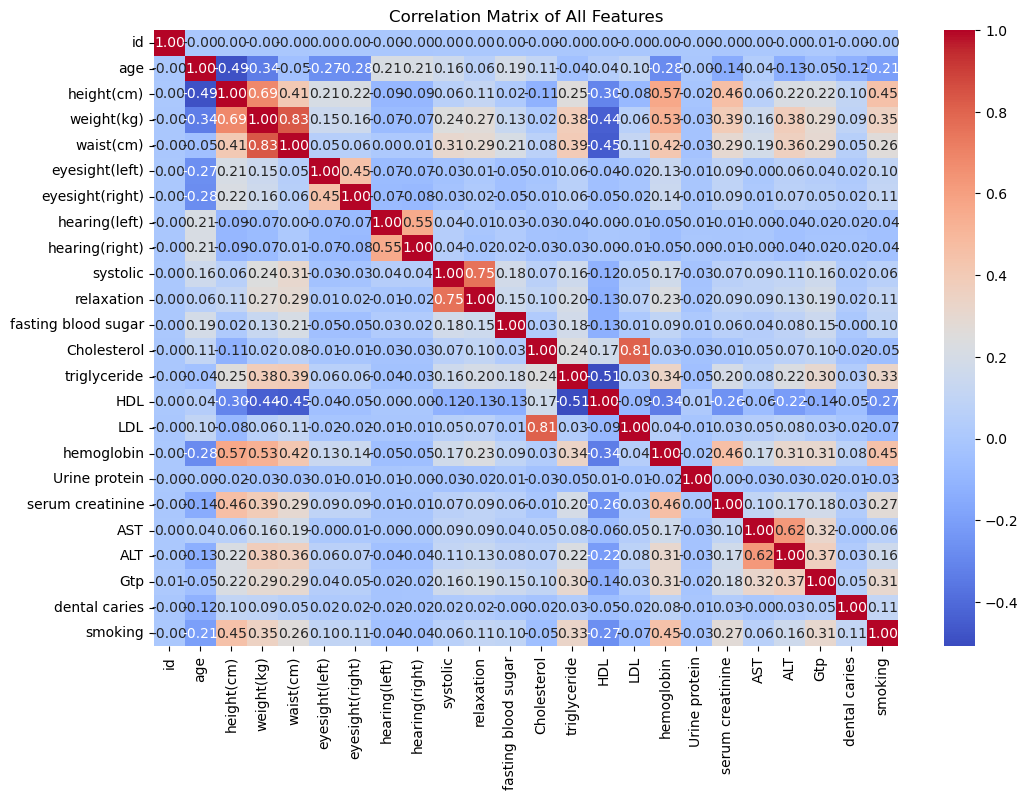

In [57]:
correlation_matrix = all_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

In [58]:
selected_columns = all_data[['hemoglobin', 'height(cm)', 'triglyceride']]
selected_columns.head()

,hemoglobin,height(cm),triglyceride
0,16.5,165,300
1,16.2,165,55
2,17.4,170,197
3,15.9,180,203
4,15.4,165,87


In [59]:
data = pd.read_csv('your_data.csv')
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1
1,1,57,83,1,2,126,1,2,65,0.7,89.0,0
2,2,45,75,1,1,93,0,1,75,0.5,81.0,1
3,3,38,88,1,1,102,1,1,95,1.2,105.0,0
4,4,44,76,1,1,93,0,1,60,1.0,80.5,1


In [60]:
data = pd.concat([data, selected_columns], axis=1)
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1,16.5,165,300
1,1,57,83,1,2,126,1,2,65,0.7,89.0,0,16.2,165,55
2,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197
3,3,38,88,1,1,102,1,1,95,1.2,105.0,0,15.9,180,203
4,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               159256 non-null  int64  
 1   HDL              159256 non-null  int64  
 2   relaxation       159256 non-null  int64  
 3   Urine protein    159256 non-null  int64  
 4   hearing(right)   159256 non-null  int64  
 5   LDL              159256 non-null  int64  
 6   dental caries    159256 non-null  int64  
 7   hearing(left)    159256 non-null  int64  
 8   weight(kg)       159256 non-null  int64  
 9   eyesight(right)  159256 non-null  float64
 10  waist(cm)        159256 non-null  float64
 11  smoking          159256 non-null  int64  
 12  hemoglobin       159256 non-null  float64
 13  height(cm)       159256 non-null  int64  
 14  triglyceride     159256 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 18.2 MB


In [62]:
data.isna().sum()

id                 0
HDL                0
relaxation         0
Urine protein      0
hearing(right)     0
LDL                0
dental caries      0
hearing(left)      0
weight(kg)         0
eyesight(right)    0
waist(cm)          0
smoking            0
hemoglobin         0
height(cm)         0
triglyceride       0
dtype: int64

In [63]:
data.duplicated().sum()

0

In [64]:
data.describe()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,55.852684,76.874071,1.074233,1.023421,114.607682,0.197996,1.023974,67.143662,1.000989,83.001990,0.437365,14.796965,165.266929,127.616046
std,45973.391572,13.964141,8.994642,0.347856,0.151238,28.158931,0.398490,0.152969,12.586198,0.392299,8.957937,0.496063,1.431213,8.818970,66.188989
min,0.000000,9.000000,44.000000,1.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.100000,51.000000,0.000000,4.900000,135.000000,8.000000
25%,39813.750000,45.000000,70.000000,1.000000,1.000000,95.000000,0.000000,1.000000,60.000000,0.800000,77.000000,0.000000,13.800000,160.000000,77.000000
50%,79627.500000,54.000000,78.000000,1.000000,1.000000,114.000000,0.000000,1.000000,65.000000,1.000000,83.000000,0.000000,15.000000,165.000000,115.000000
75%,119441.250000,64.000000,82.000000,1.000000,1.000000,133.000000,0.000000,1.000000,75.000000,1.200000,89.000000,1.000000,15.800000,170.000000,165.000000
max,159255.000000,136.000000,133.000000,6.000000,2.000000,1860.000000,1.000000,2.000000,130.000000,9.900000,127.000000,1.000000,21.000000,190.000000,766.000000


In [65]:
numerical_columns = data.columns
numerical_columns = numerical_columns[numerical_columns != 'id']  # Exclude 'id'
for column in numerical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")

Value counts for HDL:
HDL
47     5431
46     5200
44     4983
48     4968
49     4939
       ... 
18        1
9         1
123       1
118       1
22        1
Name: count, Length: 108, dtype: int64


Value counts for relaxation:
relaxation
80     20326
70     16878
78     10258
74      5924
72      5875
       ...  
44         2
121        1
133        1
122        1
47         1
Name: count, Length: 75, dtype: int64


Value counts for Urine protein:
Urine protein
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: count, dtype: int64


Value counts for hearing(right):
hearing(right)
1    155526
2      3730
Name: count, dtype: int64


Value counts for LDL:
LDL
112    2515
106    2495
121    2360
116    2341
107    2304
       ... 
790       1
292       1
226       1
23        1
15        1
Name: count, Length: 222, dtype: int64


Value counts for dental caries:
dental caries
0    127724
1     31532
Name: count, dtype: int64


Value counts for hearing(left):
hea

# Nsheel el Outliers

In [66]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
for column in numerical_columns:
    data = remove_outliers_iqr(data, column)

data.reset_index(drop=True, inplace=True)
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1,16.5,165,300
1,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197
2,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87
3,6,69,88,1,1,122,0,1,55,1.2,69.0,0,13.0,160,153
4,8,59,80,1,1,150,0,1,70,1.0,89.0,1,15.7,165,163


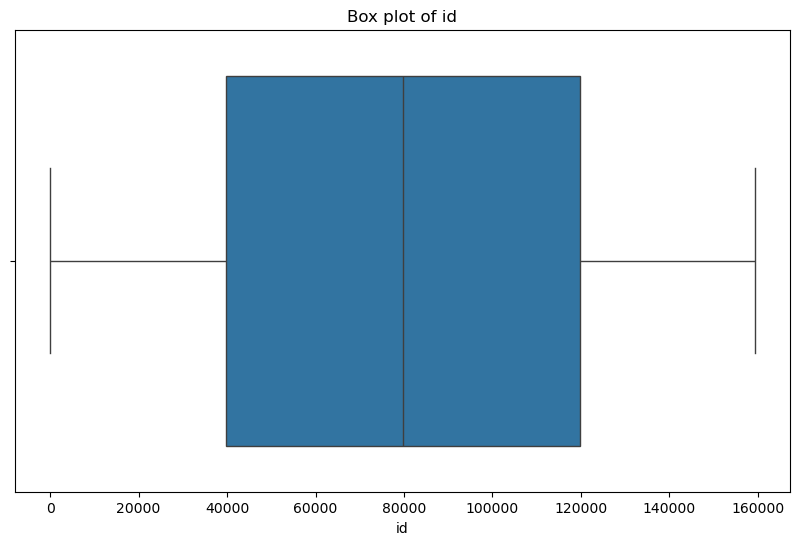

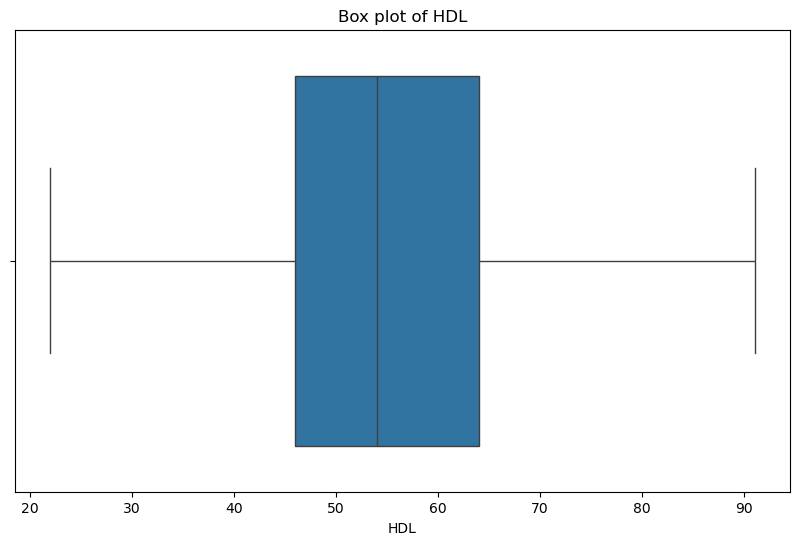

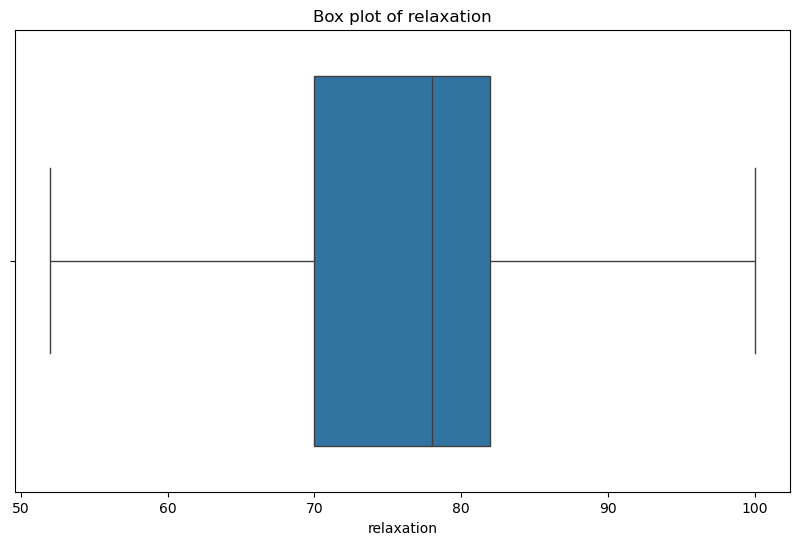

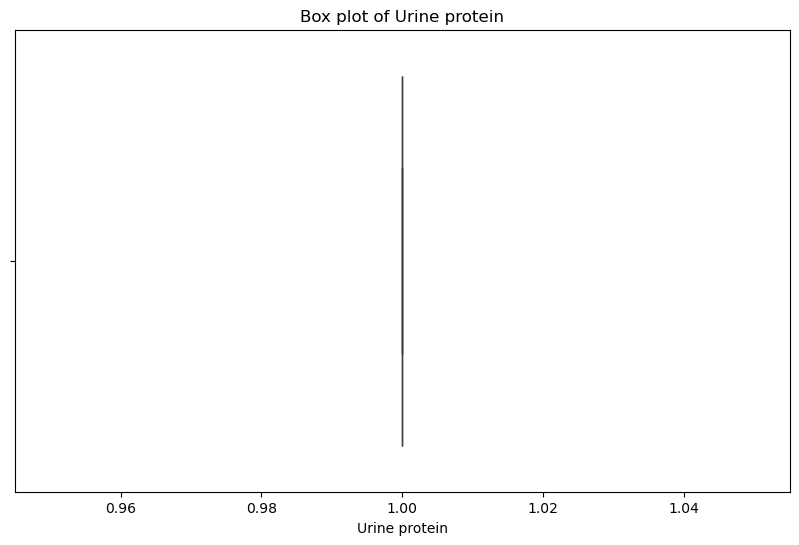

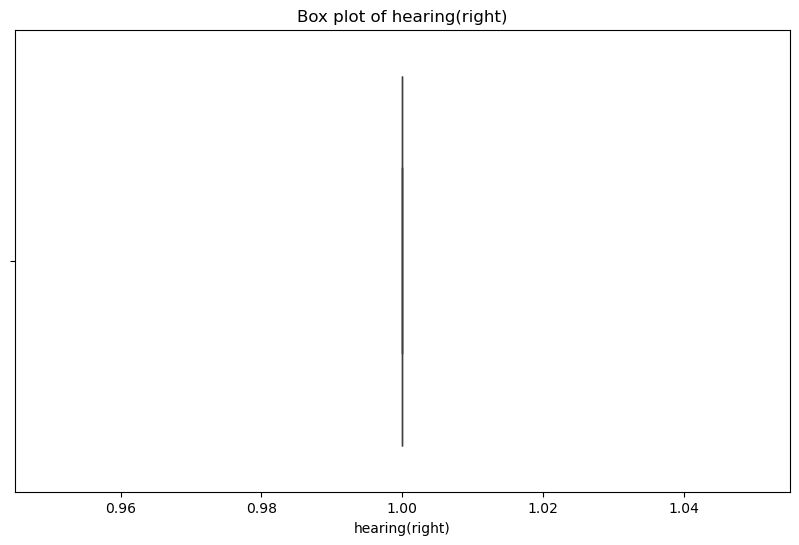

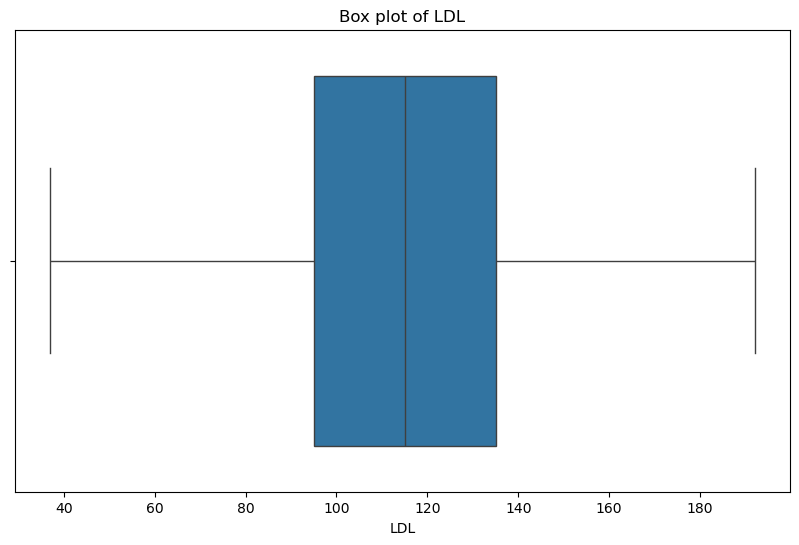

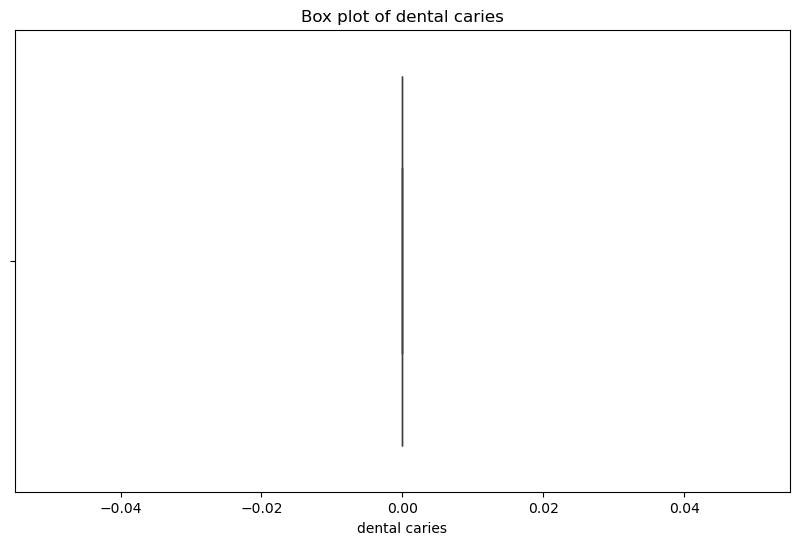

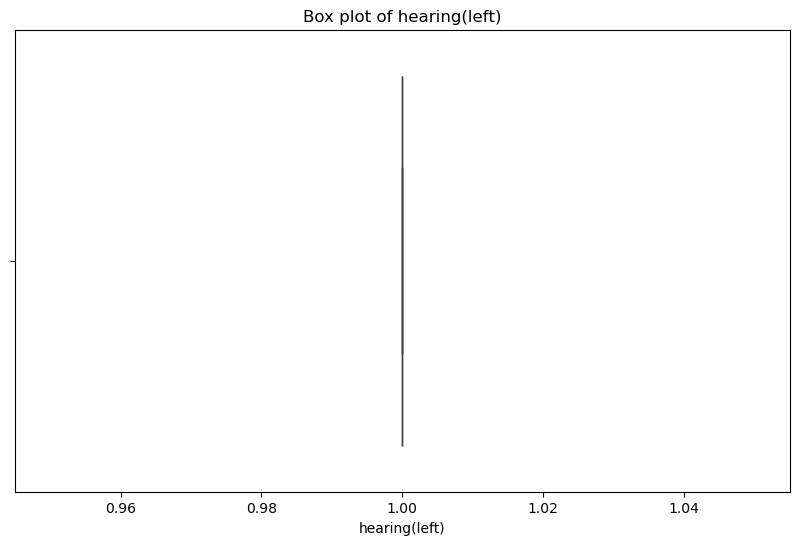

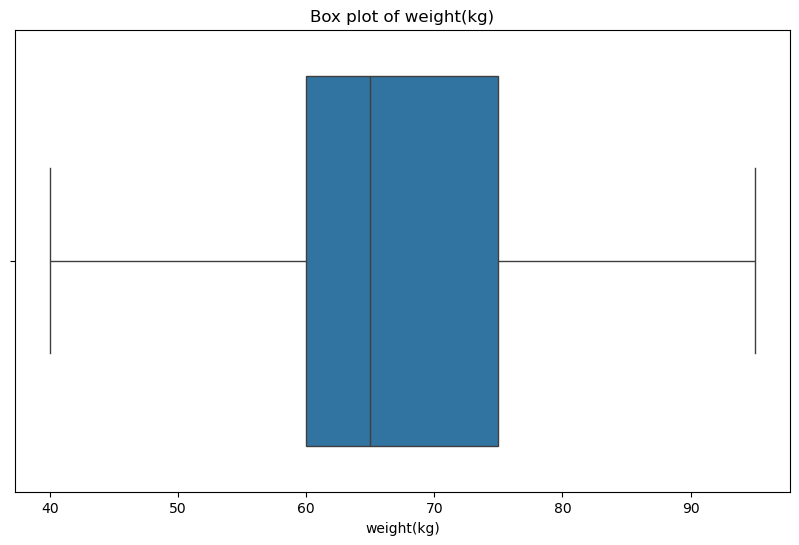

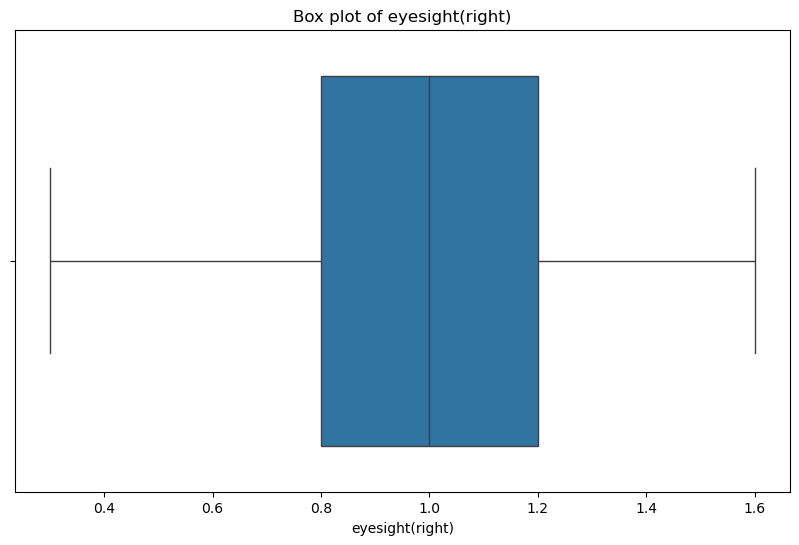

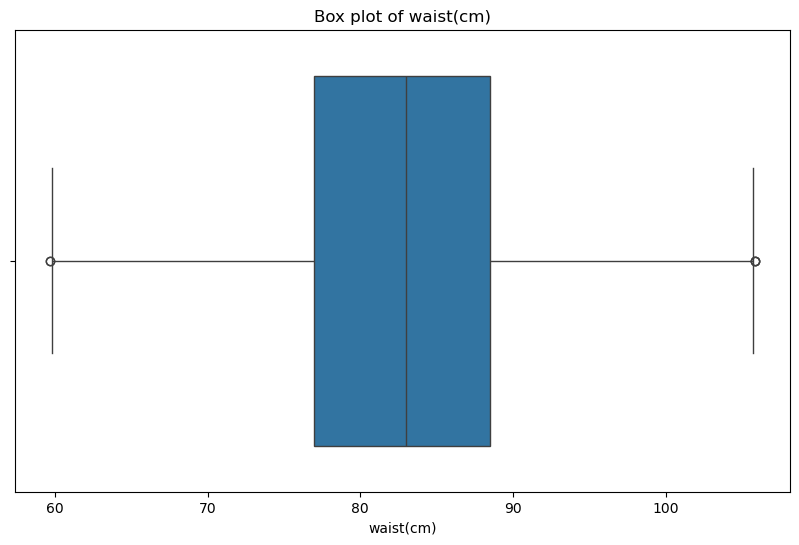

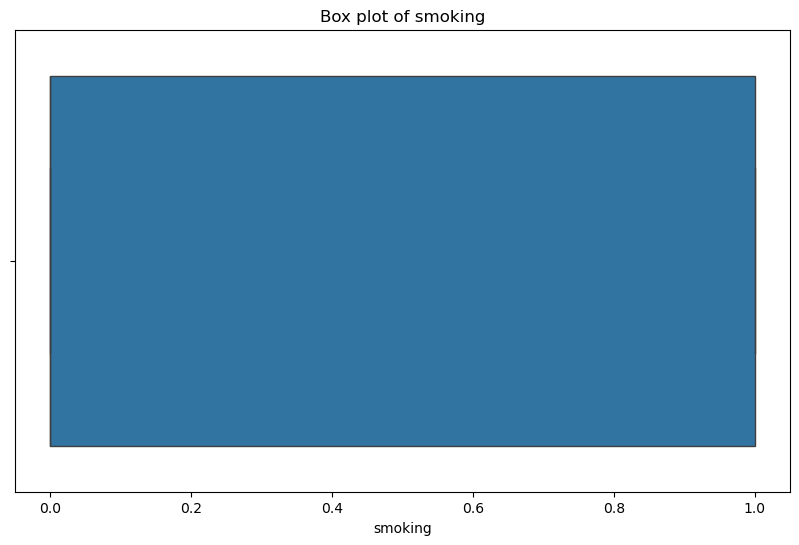

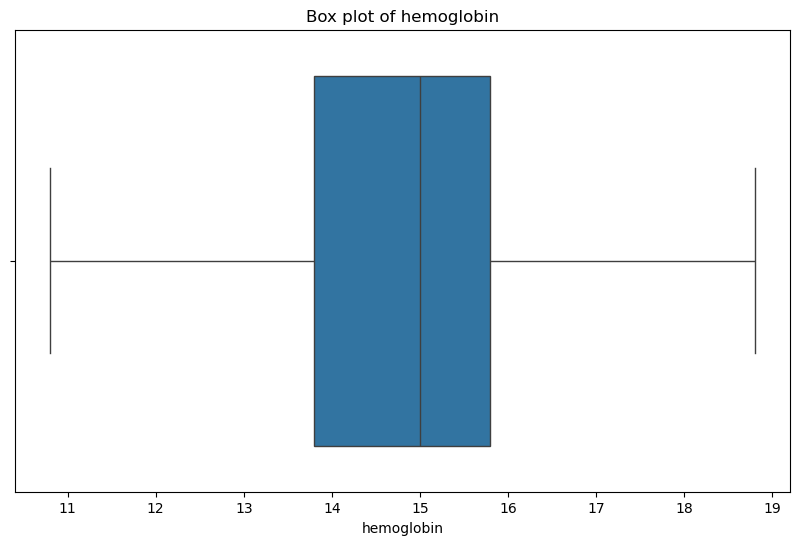

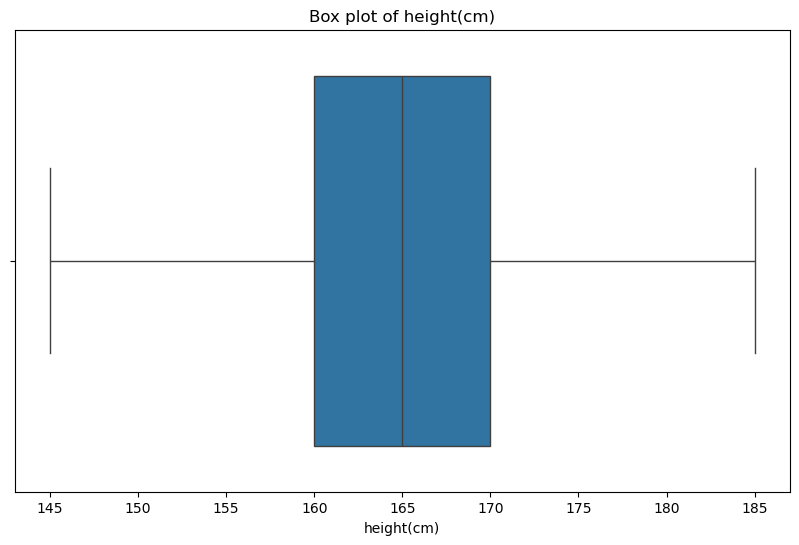

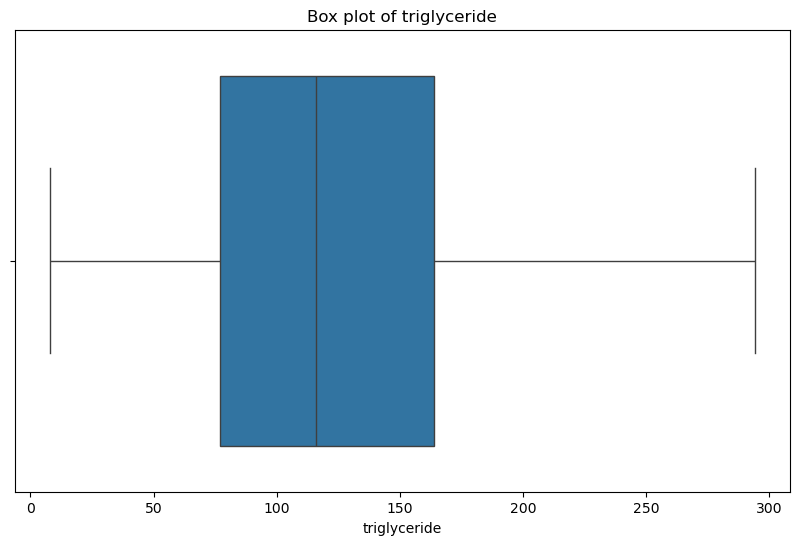

In [67]:
# Apply the IQR outlier removal function to all columns
for column in data.columns:
    data = remove_outliers_iqr(data, column)

# Function to plot box plots for each column
def plot_box_plots(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

# Plot box plots for each column in the data
plot_box_plots(data)

In [68]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column and print the number of rows before and after removing outliers
for column in numerical_columns:
    print(f"Number of rows before removing outliers in {column}: {data.shape[0]}")
    data = remove_outliers_iqr(data, column)
    print(f"Number of rows after removing outliers in {column}: {data.shape[0]}")

data.reset_index(drop=True, inplace=True)
data.head()

Number of rows before removing outliers in HDL: 106289
Number of rows after removing outliers in HDL: 106289
Number of rows before removing outliers in relaxation: 106289
Number of rows after removing outliers in relaxation: 106289
Number of rows before removing outliers in Urine protein: 106289
Number of rows after removing outliers in Urine protein: 106289
Number of rows before removing outliers in hearing(right): 106289
Number of rows after removing outliers in hearing(right): 106289
Number of rows before removing outliers in LDL: 106289
Number of rows after removing outliers in LDL: 106289
Number of rows before removing outliers in dental caries: 106289
Number of rows after removing outliers in dental caries: 106289
Number of rows before removing outliers in hearing(left): 106289
Number of rows after removing outliers in hearing(left): 106289
Number of rows before removing outliers in weight(kg): 106289
Number of rows after removing outliers in weight(kg): 106289
Number of rows bef

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
0,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197
1,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87
2,6,69,88,1,1,122,0,1,55,1.2,69.0,0,13.0,160,153
3,8,59,80,1,1,150,0,1,70,1.0,89.0,1,15.7,165,163
4,9,55,70,1,1,122,0,1,50,1.5,73.0,0,13.2,155,27


# Feature engineering

In [69]:
# Create a new feature 'Cholesterol_Ratio' based on 'HDL' and 'LDL'
data['Cholesterol_Ratio'] = data['HDL'] / data['LDL']

data['Height_to_Waist_Ratio'] = data['height(cm)'] / data['waist(cm)']

# Create a new feature 'Hemoglobin_Level' based on 'hemoglobin'
data['Hemoglobin_Level'] = pd.cut(data['hemoglobin'], bins=[0, 12, 16, np.inf], labels=False)

# Create a new feature 'BMI' (Body Mass Index) based on 'weight(kg)' and 'waist(cm)'
data['BMI'] = data['weight(kg)'] / (data['waist(cm)'] / 100) ** 2

In [70]:
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride,Cholesterol_Ratio,Height_to_Waist_Ratio,Hemoglobin_Level,BMI
0,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197,0.483871,2.098765,2,114.311843
1,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87,0.473118,2.049689,1,92.589020
2,6,69,88,1,1,122,0,1,55,1.2,69.0,0,13.0,160,153,0.565574,2.318841,1,115.521949
3,8,59,80,1,1,150,0,1,70,1.0,89.0,1,15.7,165,163,0.393333,1.853933,1,88.372680
4,9,55,70,1,1,122,0,1,50,1.5,73.0,0,13.2,155,27,0.450820,2.123288,1,93.826234


In [71]:
correlation_matrix = data[['BMI','Cholesterol_Ratio','Height_to_Waist_Ratio','Hemoglobin_Level','smoking']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

Correlation Matrix:
                             id       HDL  relaxation  Urine protein  \
id                     1.000000  0.004812   -0.000896            NaN   
HDL                    0.004812  1.000000   -0.117612            NaN   
relaxation            -0.000896 -0.117612    1.000000            NaN   
Urine protein               NaN       NaN         NaN            NaN   
hearing(right)              NaN       NaN         NaN            NaN   
LDL                   -0.005213 -0.084682    0.083475            NaN   
dental caries               NaN       NaN         NaN            NaN   
hearing(left)               NaN       NaN         NaN            NaN   
weight(kg)            -0.000472 -0.427463    0.243733            NaN   
eyesight(right)        0.000635 -0.052046    0.006687            NaN   
waist(cm)             -0.002352 -0.437122    0.273693            NaN   
smoking               -0.000431 -0.265302    0.093461            NaN   
hemoglobin             0.001028 -0.333386   

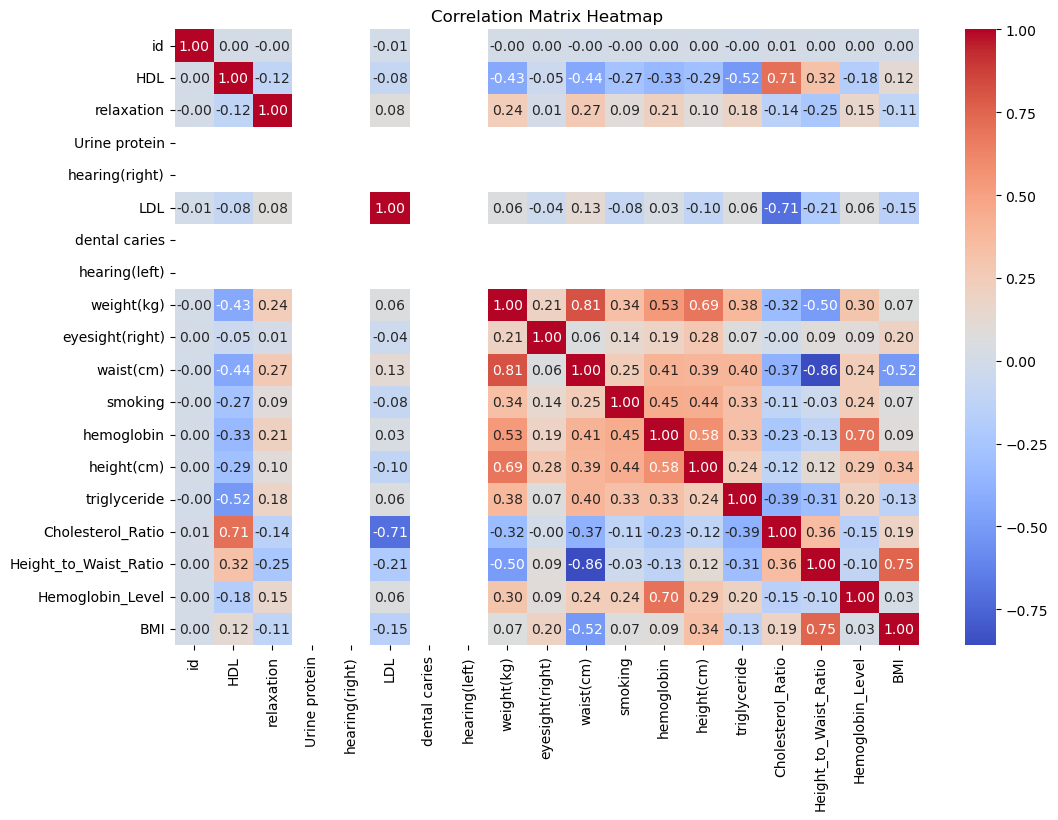

Top 5 features most correlated with 'smoking':
hemoglobin      0.445564
height(cm)      0.436113
weight(kg)      0.338878
triglyceride    0.329933
waist(cm)       0.247479
Name: smoking, dtype: float64


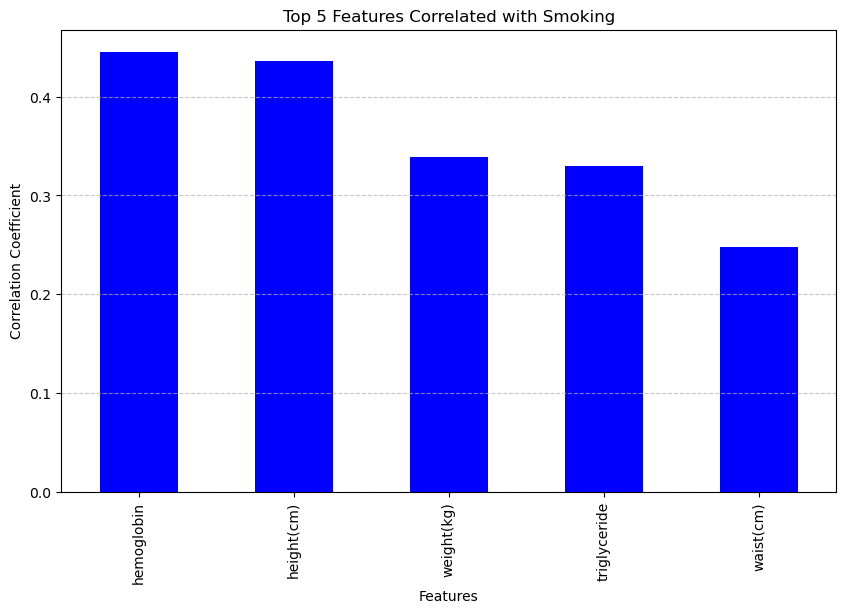

In [18]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify the top 5 features that are most correlated with the target variable 'smoking'
correlation_with_target = correlation_matrix['smoking'].drop('smoking').sort_values(ascending=False)
top_5_correlated_features = correlation_with_target.head(5)

# Display the top 5 correlated features
print("Top 5 features most correlated with 'smoking':")
print(top_5_correlated_features)

# Plot the correlation of the top 5 features with the target variable 'smoking'
plt.figure(figsize=(10, 6))
top_5_correlated_features.plot(kind='bar', color='blue')
plt.title('Top 5 Features Correlated with Smoking')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Preprocess the data
# Assuming 'smoking' is the target variable and the rest are features
X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables if any
X = pd.get_dummies(X)



In [20]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)


c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Predict on the validation data
y_valid_pred_logistic = logistic_model.predict(X_valid)


In [25]:
# Print classification report
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_valid, y_valid_pred_logistic))

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      9245
           1       0.67      0.64      0.65      6698

    accuracy                           0.71     15943
   macro avg       0.71      0.70      0.70     15943
weighted avg       0.71      0.71      0.71     15943



Confusion Matrix for Logistic Regression Model:
[[7096 2149]
 [2424 4274]]


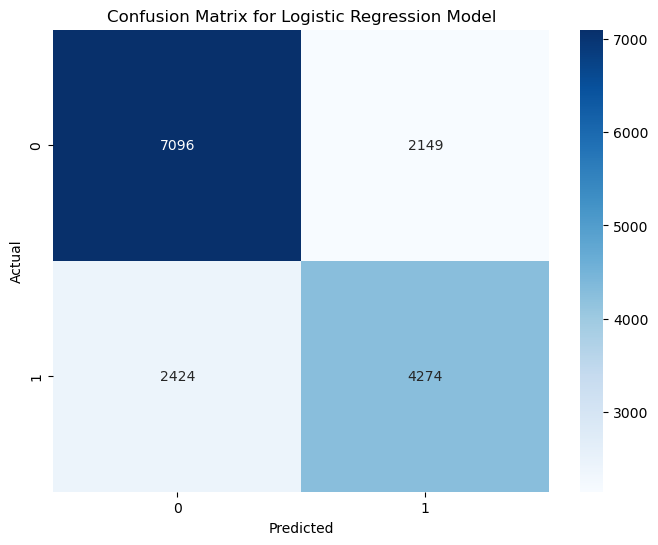

In [26]:
# Generate the confusion matrix
conf_matrix_logistic = confusion_matrix(y_valid, y_valid_pred_logistic)
print("Confusion Matrix for Logistic Regression Model:")
print(conf_matrix_logistic)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


=== Decision Tree Model Performance ===

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.76     12247
           1       0.66      0.76      0.71      9010

    accuracy                           0.73     21257
   macro avg       0.73      0.74      0.73     21257
weighted avg       0.74      0.73      0.74     21257


Confusion Matrix:
[[8722 3525]
 [2128 6882]]

Feature Importance:
        feature  importance
0    height(cm)    0.711352
5    hemoglobin    0.149196
6  triglyceride    0.139452
1    weight(kg)    0.000000
2     waist(cm)    0.000000
3           HDL    0.000000
4           LDL    0.000000


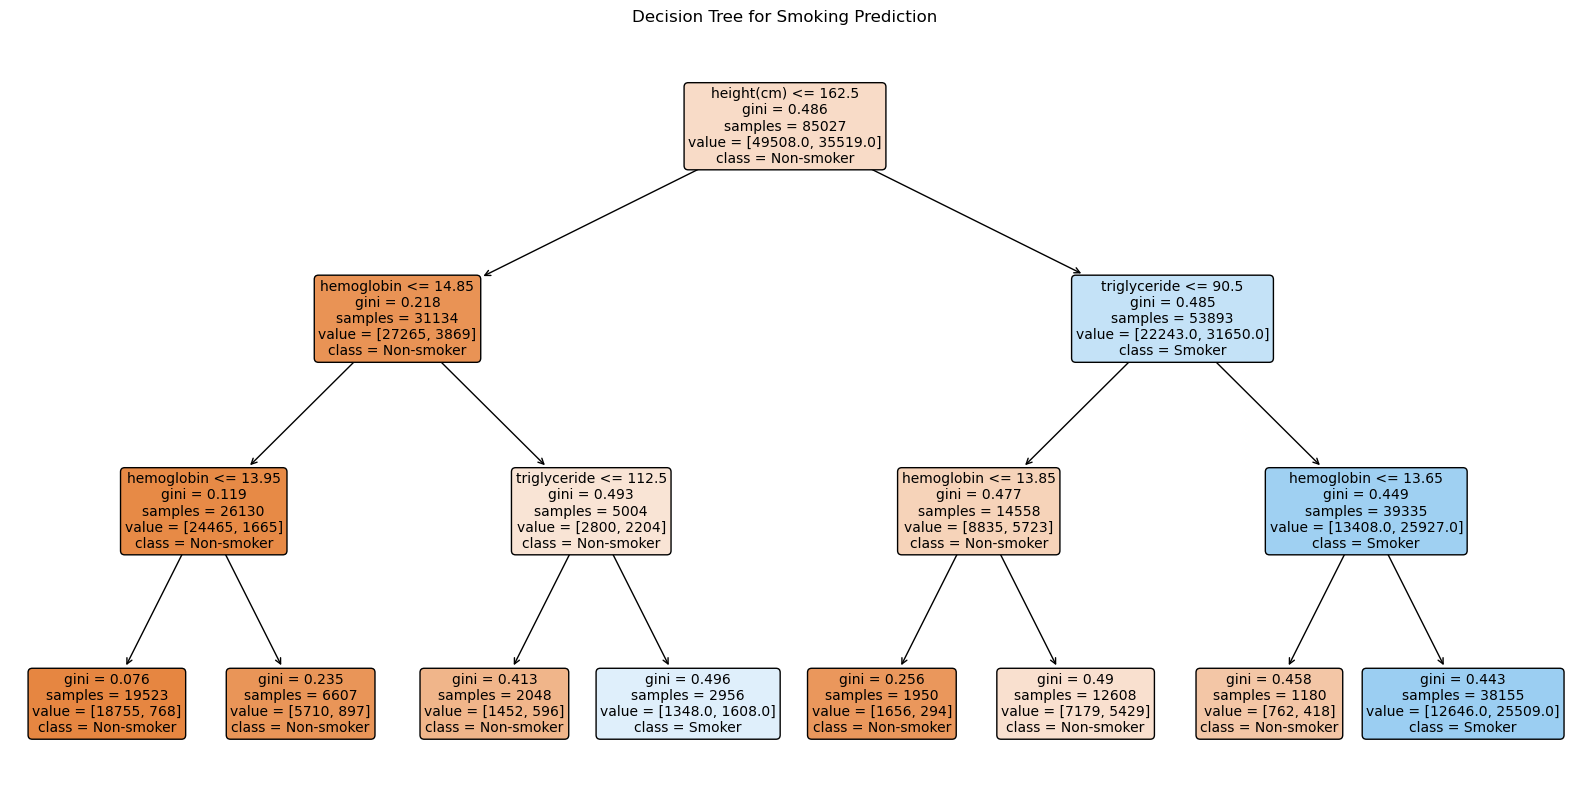

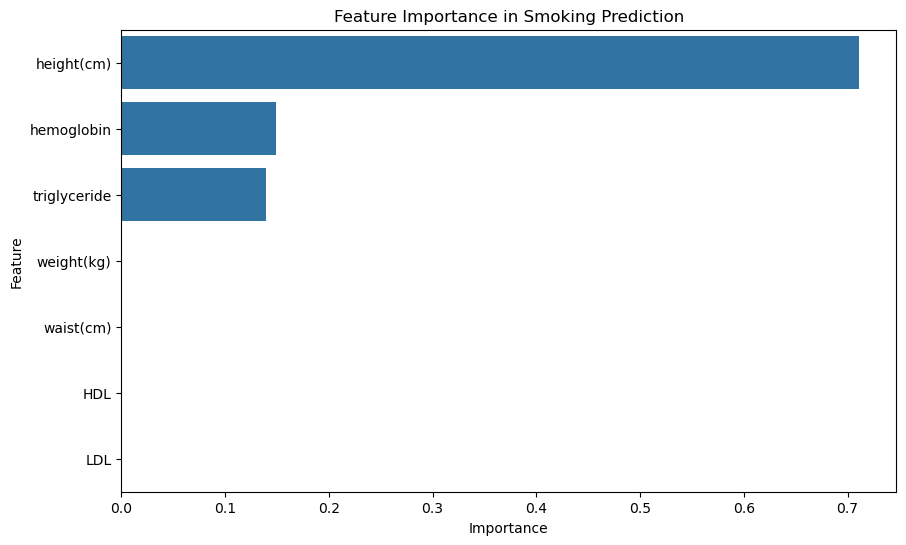

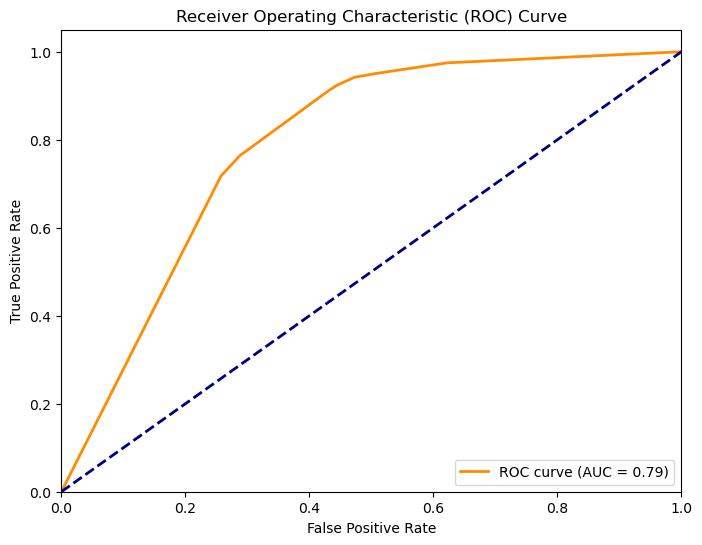


Cross-validation scores: [0.73293503 0.73439338 0.73373477 0.73152373 0.72661837]
Average CV score: 0.732 (+/- 0.006)

Example Predictions:

Example 1:
Features:
height(cm): 165.00
weight(kg): 90.00
waist(cm): 94.00
HDL: 43.00
LDL: 140.00
hemoglobin: 15.10
triglyceride: 214.00
Predicted: Smoker
Probability of being a smoker: 0.67

Example 2:
Features:
height(cm): 145.00
weight(kg): 50.00
waist(cm): 79.00
HDL: 47.00
LDL: 149.00
hemoglobin: 13.90
triglyceride: 122.00
Predicted: Non-smoker
Probability of being a smoker: 0.04

Example 3:
Features:
height(cm): 165.00
weight(kg): 70.00
waist(cm): 86.30
HDL: 44.00
LDL: 142.00
hemoglobin: 17.00
triglyceride: 190.00
Predicted: Smoker
Probability of being a smoker: 0.67

Example 4:
Features:
height(cm): 170.00
weight(kg): 75.00
waist(cm): 83.00
HDL: 61.00
LDL: 101.00
hemoglobin: 15.70
triglyceride: 193.00
Predicted: Smoker
Probability of being a smoker: 0.67

Example 5:
Features:
height(cm): 165.00
weight(kg): 70.00
waist(cm): 86.00
HDL: 48.00


In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prepare the data
X = data[['height(cm)', 'weight(kg)', 'waist(cm)', 'HDL', 'LDL', 'hemoglobin', 'triglyceride']]
y = data['smoking']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for visualization
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Print model performance
print("=== Decision Tree Model Performance ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Non-smoker', 'Smoker'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Smoking Prediction")
plt.show()

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Smoking Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Additional visualization: ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Cross-validation scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Example predictions
print("\nExample Predictions:")
example_data = X_test.head(5)
predictions = dt.predict(example_data)
probabilities = dt.predict_proba(example_data)

for i in range(5):
    print(f"\nExample {i+1}:")
    print("Features:")
    for feature, value in example_data.iloc[i].items():
        print(f"{feature}: {value:.2f}")
    print(f"Predicted: {'Smoker' if predictions[i] == 1 else 'Non-smoker'}")
    print(f"Probability of being a smoker: {probabilities[i][1]:.2f}")

In [36]:
# Cell 2: Define helper functions
def bootstrap_sample(X, y):
    """Generate a bootstrap sample"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
        
    indices = np.random.choice(len(X), len(X), replace=True)
    return X[indices], y[indices]

def train_bagging_model(X, y, base_classifier, n_estimators=50):
    """Train bagging model"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
        
    classifiers = []
    for _ in range(n_estimators):
        X_sampled, y_sampled = bootstrap_sample(X, y)
        classifier = base_classifier.__class__()
        classifier.fit(X_sampled, y_sampled)
        classifiers.append(classifier)
        
    return classifiers

def predict_bagging(classifiers, X):
    """Make predictions using bagging ensemble"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    predictions = np.array([clf.predict(X) for clf in classifiers])
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

def predict_proba_bagging(classifiers, X):
    """Get probability predictions"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    probas = np.array([clf.predict_proba(X) for clf in classifiers])
    return np.mean(probas, axis=0)

In [37]:
# Cell 4: Train model and make predictions
base_classifier = DecisionTreeClassifier(random_state=42)
classifiers = train_bagging_model(X_train, y_train, base_classifier, n_estimators=50)

y_pred = predict_bagging(classifiers, X_test)
y_pred_proba = predict_proba_bagging(classifiers, X_test)

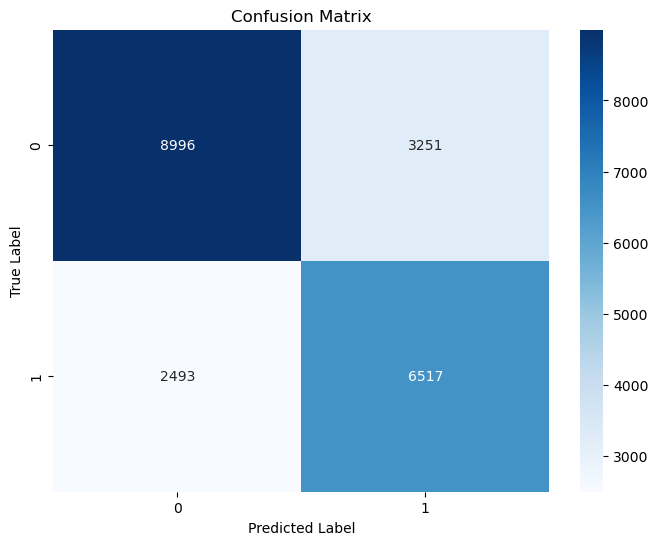

In [30]:
# Cell 6: Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [39]:
# Cell 3: Helper functions for boosting
def compute_weights(y_true, y_pred, weights):
    """Compute weights and alpha for boosting"""
    epsilon = 1e-10  # Small constant to prevent division by zero
    incorrect = (y_true != y_pred)
    
    # Calculate weighted error
    error = np.sum(weights * incorrect) / np.sum(weights)
    error = np.clip(error, epsilon, 1 - epsilon)  # Prevent log(0)
    
    # Calculate alpha (importance of classifier)
    alpha = 0.5 * np.log((1 - error) / error)
    
    # Update weights
    weights = weights * np.exp(alpha * incorrect)
    weights = weights / np.sum(weights)  # Normalize
    
    return weights, alpha

def weighted_subsample(X, y, weights):
    """Create a weighted subsample of the dataset"""
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, p=weights)
    return X[indices], y[indices]

In [40]:
# Cell 4: Training function
def train_boosting(X, y, n_estimators=50, learning_rate=0.1):
    """Train boosting ensemble"""
    n_samples = X.shape[0]
    weights = np.ones(n_samples) / n_samples
    
    classifiers = []
    alphas = []
    
    for _ in range(n_estimators):
        # Get weighted subsample
        X_subset, y_subset = weighted_subsample(X, y, weights)
        
        # Train base classifier
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X_subset, y_subset)
        
        # Make predictions
        predictions = clf.predict(X)
        
        # Update weights and get alpha
        weights, alpha = compute_weights(y, predictions, weights)
        
        # Store classifier and its importance
        classifiers.append(clf)
        alphas.append(alpha * learning_rate)
    
    return classifiers, alphas

In [41]:
# Cell 5: Prediction functions
def predict_boosting(classifiers, alphas, X):
    """Make predictions using boosting ensemble"""
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)
    
    for clf, alpha in zip(classifiers, alphas):
        predictions += alpha * clf.predict(X)
    
    return (predictions > 0).astype(int)

def predict_proba_boosting(classifiers, alphas, X):
    """Get probability predictions"""
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)
    
    for clf, alpha in zip(classifiers, alphas):
        predictions += alpha * clf.predict(X)
    
    probas = 1 / (1 + np.exp(-2 * predictions))
    return np.vstack([1 - probas, probas]).T

In [44]:
# Cell 1: Train the boosting model
base_classifier = DecisionTreeClassifier(max_depth=3)
classifiers, alphas = train_boosting_model(X_train, y_train, base_classifier)

# Make predictions
y_pred = predict_boosting(classifiers, alphas, X_test)

c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: 

In [45]:
# Cell 2: Print classification metrics
print("Boosting Model Performance Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Boosting Model Performance Metrics:

Accuracy Score: 0.42691819165451383

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     12247
           1       0.43      1.00      0.60      9010

    accuracy                           0.43     21257
   macro avg       0.71      0.50      0.30     21257
weighted avg       0.76      0.43      0.26     21257



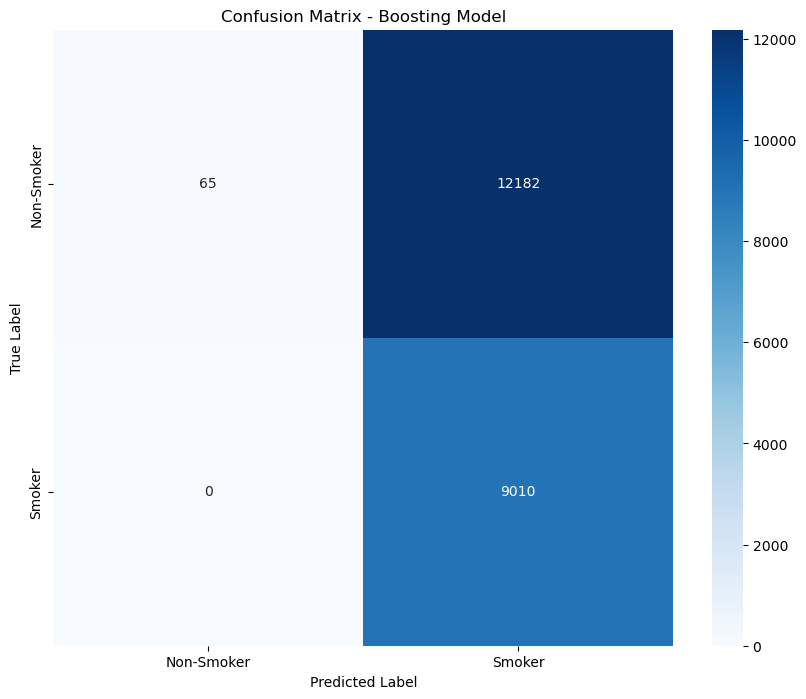


Confusion Matrix Interpretation:
True Negatives: 65
False Positives: 12182
False Negatives: 0
True Positives: 9010


In [46]:
# Cell 3: Create and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])

plt.title('Confusion Matrix - Boosting Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print confusion matrix interpretation
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives: {conf_matrix[0,0]}")
print(f"False Positives: {conf_matrix[0,1]}")
print(f"False Negatives: {conf_matrix[1,0]}")
print(f"True Positives: {conf_matrix[1,1]}")

c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sara Elmassry\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: 

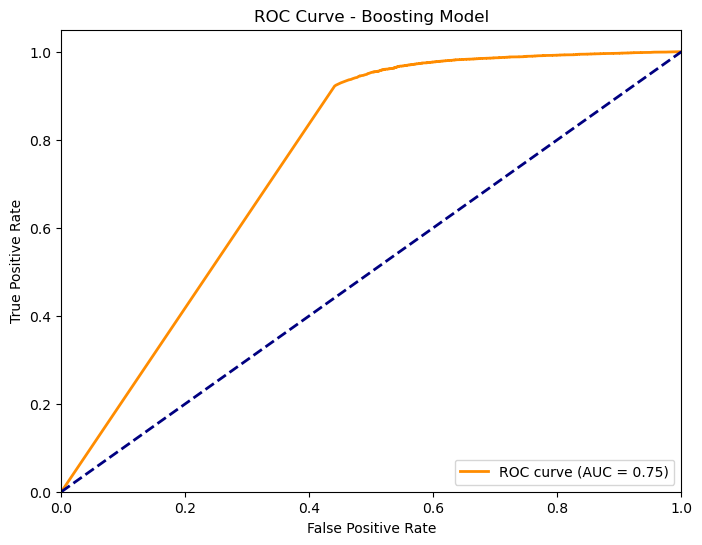

In [47]:
# Cell 4: Additional visualization - ROC Curve
from sklearn.metrics import roc_curve, auc

# Get probability predictions
y_pred_proba = predict_proba_boosting(classifiers, alphas, X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Boosting Model')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Cell 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [31]:
# Cell 4: Random Forest class
class RandomForest:
    def __init__(self, n_trees=100, max_depth=None, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        
    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]
        
        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            
            # Handle pandas DataFrame/Series properly
            if isinstance(X, pd.DataFrame):
                sample_X = X.iloc[indices]
            else:
                sample_X = X[indices]
                
            if isinstance(y, pd.Series):
                sample_y = y.iloc[indices]
            else:
                sample_y = y[indices]
            
            # Create and train decision tree
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=None
            )
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(pred).argmax() for pred in predictions.T])

In [32]:
# Cell 5: Data preprocessing
# Load and preprocess data
data = pd.read_csv('your_data.csv')


X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [33]:
# Cell 6: Train Random Forest
# Initialize and train the random forest
rf_classifier = RandomForest(n_trees=100, max_depth=10)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_valid_pred = rf_classifier.predict(X_valid_scaled)


In [7]:
# Cell 7: Classification Report
# Print classification report
print("Classification Report:")
print(classification_report(y_valid, y_valid_pred))


In [8]:
# Cell 8: Confusion Matrix
# Calculate and display confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [55]:
# Base model
model = RandomForestClassifier(random_state=42)

In [56]:
# Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)

grid_predictions = grid_search.best_estimator_.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Grid Search Accuracy: 0.752145338858889


In [57]:
from scipy.stats import randint

# Parameter distributions for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)

random_predictions = random_search.best_estimator_.predict(X_test)
print("Randomized Search Accuracy:", accuracy_score(y_test, random_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from Randomized Search: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 103}
Randomized Search Accuracy: 0.7529406839968186


Confusion Matrix for Random Forest Model:
[[9572 3787]
 [2161 8368]]


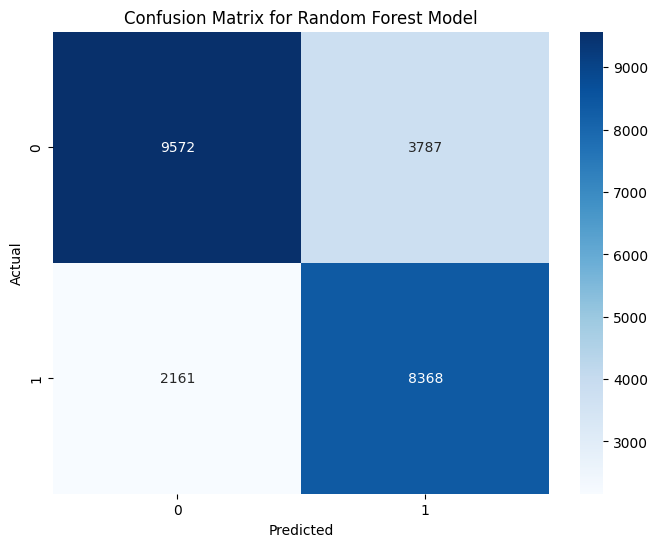

In [58]:
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation set
y_valid_pred_rf = rf_model.predict(X_valid)

# Create the confusion matrix
conf_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)

# Display the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix_rf)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [59]:
# Base model
model = GradientBoostingClassifier(random_state=42)

In [60]:
# Simplified Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)

grid_predictions = grid_search.best_estimator_.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Grid Search Accuracy: 0.7568336891456319


In [61]:
# Parameter distributions for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)

random_predictions = random_search.best_estimator_.predict(X_test)
print("Randomized Search Accuracy:", accuracy_score(y_test, random_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters from Randomized Search: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 181, 'subsample': 0.6}
Randomized Search Accuracy: 0.7549499769768513


Confusion Matrix for Gradient Boosting Model:
[[9468 3891]
 [1953 8576]]


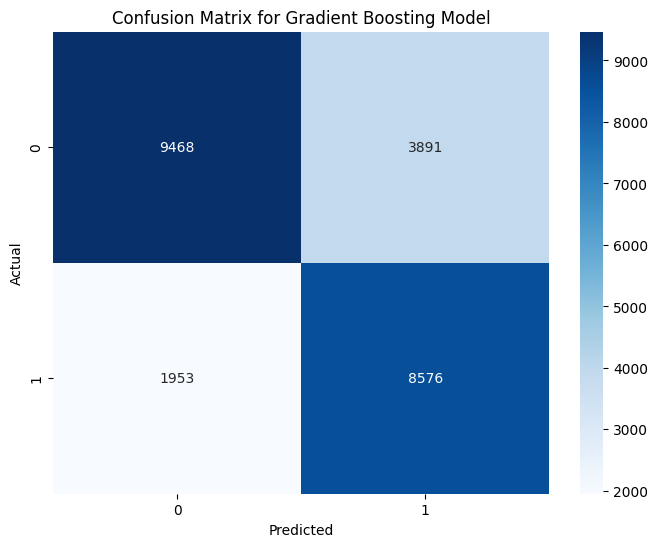

In [62]:
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation set
y_valid_pred_boosting = boosting_model.predict(X_valid)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred_boosting)

# Display the confusion matrix
print("Confusion Matrix for Gradient Boosting Model:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

Random Forest Validation Accuracy: 0.7511302746148694
              precision    recall  f1-score   support

           0       0.82      0.71      0.76     13359
           1       0.69      0.80      0.74     10529

    accuracy                           0.75     23888
   macro avg       0.75      0.76      0.75     23888
weighted avg       0.76      0.75      0.75     23888

Confusion Matrix for Random Forest Model:
[[9544 3815]
 [2130 8399]]


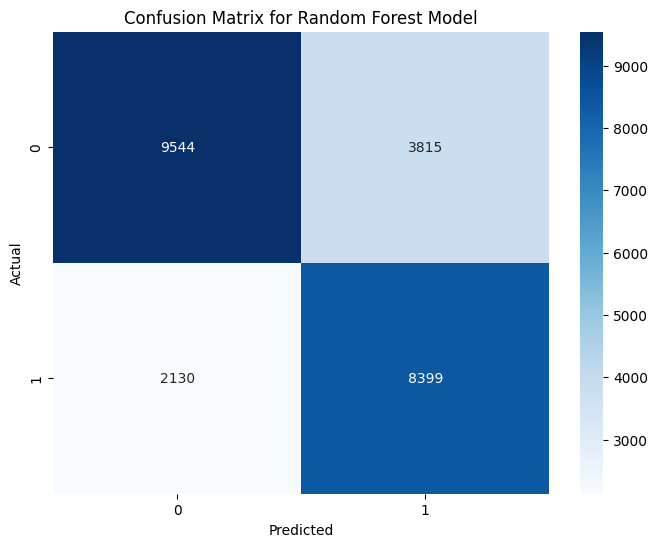

In [63]:
# Drop the specified columns
data = data.drop(columns=['hearing(left)', 'hearing(right)', 'Urine protein'])

# Preprocess the data
X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables if any
X = pd.get_dummies(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train the model again (using RandomForest as an example)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_valid_pred_rf = rf_model.predict(X_valid_scaled)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f'Random Forest Validation Accuracy: {valid_accuracy_rf}')
print(classification_report(y_valid, y_valid_pred_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix_rf)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()